# 1. Indonesia Credit Customer Segmentation

## Data Content

- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (text - little, moderate, rich)
- Credit amount (numeric, in IDR)
- Duration (numeric, in month)
- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

# 2. Introduction

Nama : Ulul Azmi \
Batch : Hacktiv8 FTDS 015 Remote \
Dataset : IndonesiaCreditData \
Problems : Credit risk is defined as the risk of loss associated with the possibility of a counterparty's failure to fulfill its obligations; or the risk that the debtor does not repay the debt.
it is very important for the continuity of the company. thats why i make model Indonesia Credit Customer Segmentation.

# Import Pustaka

In [1]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as shc 

from tqdm import tqdm
from sklearn.metrics import silhouette_score

#connect G Drive
from google.colab import drive

In [3]:
# For Caping
!pip install feature-engine
from feature_engine.outliers import Winsorizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 3. Data Loading

In [4]:
# Connect Colab to Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Load Dataset
data = pd.read_excel(open("/content/drive/MyDrive/Talent Fair Datasets/2/IndonesiaCreditData.xlsx",'rb'),sheet_name='Dataset')

In [6]:
# Show 5 first data
data.head()

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,2,49,male,1,own,little,NaN,25988304,12,education
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment
4,4,53,male,2,free,little,little,60383130,24,car


In [7]:
# Show 5 last data
data.tail()

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,21524664,12,furniture/equipment
996,996,40,male,3,own,little,little,47822943,30,car
997,997,38,male,2,own,little,NaN,9968796,12,radio/TV
998,998,23,male,2,free,little,little,22876155,45,radio/TV
999,999,27,male,2,own,moderate,moderate,56737824,45,car


In [8]:
# Drop Useles Column
data = data.drop('No', axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [10]:
# Change job column Dtype to object because the column has a binary value.
data["Job"] = data["Job"].astype("str")

In [11]:
#Copy Dataset
data_ori = data.copy()

In [12]:
# Recheck Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [13]:
data.describe()

,Age,Credit amount,Duration
count,1000.000000,1.000000e+03,1000.000000
mean,35.546000,4.056033e+07,20.903000
std,11.375469,3.499911e+07,12.058814
min,19.000000,3.099750e+06,4.000000
25%,27.000000,1.693083e+07,12.000000
50%,33.000000,2.875948e+07,18.000000
75%,42.000000,4.925193e+07,24.000000
max,75.000000,2.284392e+08,72.000000


- We have four numeric and five categorical features.
- The average age of people in our dataset is 35.54
- The average credit amount borrowed is IDR 40,560,327.942.
- The average Duration is 20.9.

# Exploratory Data Analysis (EDA)

In [14]:
# Check Missing Values
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [15]:
# Check Missing Values percentage
data.isnull().mean()

Age                 0.000
Sex                 0.000
Job                 0.000
Housing             0.000
Saving accounts     0.183
Checking account    0.394
Credit amount       0.000
Duration            0.000
Purpose             0.000
dtype: float64

there are missing values ​​in the saving accounts and checking account columns.
saving accounts column has 18.3% or 183 missing values.
checking account has 39.4% or 394 missing values.
I think we can assume that NaNs in both of these columns imply that these people don't have bank accounts. Because if they did, I think that would've been logged into the data. Hence, we can fill in this missing values with 'none'.

In [16]:
# Replace missing values with 'none'
for col in ['Saving accounts', 'Checking account']:
    data[col].fillna('none', inplace=True)

In [17]:
# recheck Missing Values
data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

there are no missing values ​​anymore

### Numerical Variable Analysis

In [18]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (data) and the variable of interest as arguments.

def diagnostic_plots(data, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

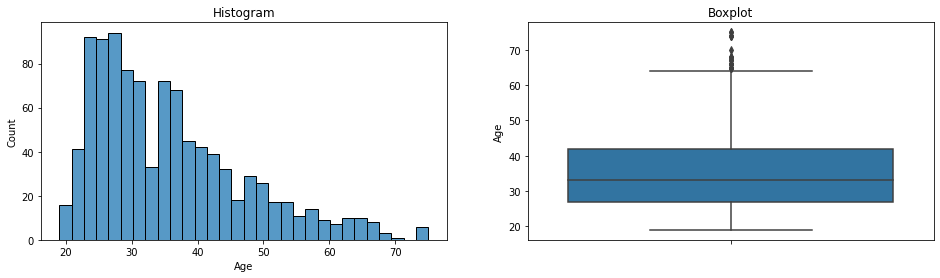


Skewness Value :  1.0207392686768317


In [19]:
# Create Histogram & boxplot Age distribution

diagnostic_plots(data, 'Age')
print('\nSkewness Value : ', data['Age'].skew())

- Most people are 20 to 60 years old
- Age Column distribution is skew.

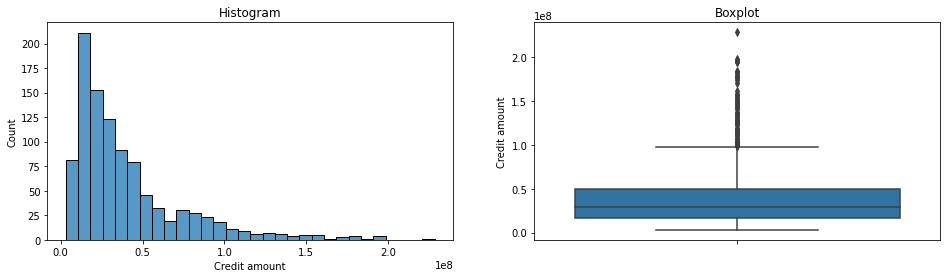


Skewness Value :  1.9496276798326202


In [20]:
# Create Histogram & boxplot Credit amount distribution

diagnostic_plots(data, 'Credit amount')
print('\nSkewness Value : ', data['Credit amount'].skew())

Credit amount Column distribution is skew and has many outliers

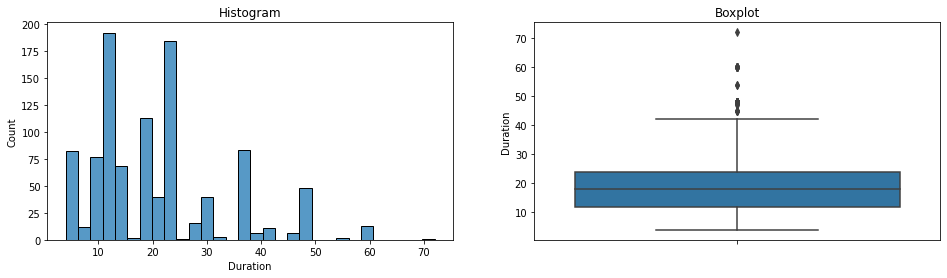


Skewness Value :  1.0941841715555418


In [21]:
# Create Histogram & boxplot Duration distribution

diagnostic_plots(data, 'Duration')
print('\nSkewness Value : ', data['Duration'].skew())

Duration Column distribution is skew and has many outliers.

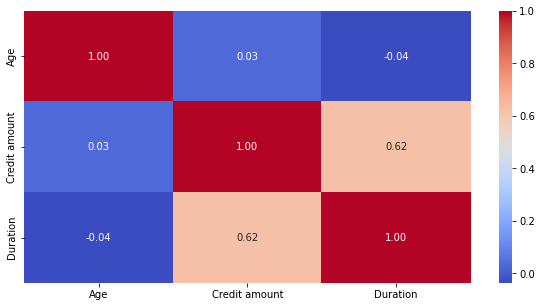

In [22]:
# Check Numerical column Corelation
plt.figure(figsize=(10,5))
heatmap = sns.heatmap(data.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

as we can see in the heatmap, there is a correlation between the Credit amount & duration columns.

### Categorical Variable Analysis

**Sex**

In [23]:
# Check unique Values
print(np.sort(data['Sex'].unique()))
print('Total Unique Values :', data['Sex'].nunique())

['female' 'male']
Total Unique Values : 2


In [24]:
data["Sex"].value_counts()

male      690
female    310
Name: Sex, dtype: int64

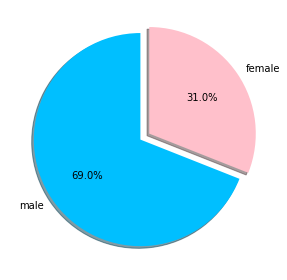

In [25]:
colors = ['deepskyblue', 'Pink']
genders = ["male","female"]
plt.pie(data["Sex"].value_counts(), labels= genders, explode = [0, 0.1], colors = colors, startangle=90, autopct='%.1f%%', shadow = True )
plt.tight_layout()
plt.show()

male twice more than female in our dataset.

In [26]:
# Distribution of Gender by age
by_age = data['Age'].values.tolist()
male_age = data['Age'].loc[data['Sex'] == 'male'].values.tolist()
female_age = data['Age'].loc[data['Sex'] == 'female'].values.tolist()

trace0 = go.Histogram(
    x=male_age,
    histnorm='probability',
    name="Male",
    marker = dict(
        color = 'rgba(100, 149, 237, 0.6)',
    )
)
trace1 = go.Histogram(
    x=female_age,
    histnorm='probability',
    name="Female",
    marker = dict(
        color = 'rgba(255, 182, 193, 0.6)',
    )
)
trace2 = go.Histogram(
    x=by_age,
    histnorm='probability',
    name="Overall Gender",
     marker = dict(
        color = 'rgba(169, 169, 169, 0.6)',
    )
)
fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Male','Female', 'All Genders'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Distribution of Gender', bargap=0.05)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



- Most male who apply for credit loans have an age range of 20-40 years.
- Most female who apply for credit loans have an age range of 20-30 years.

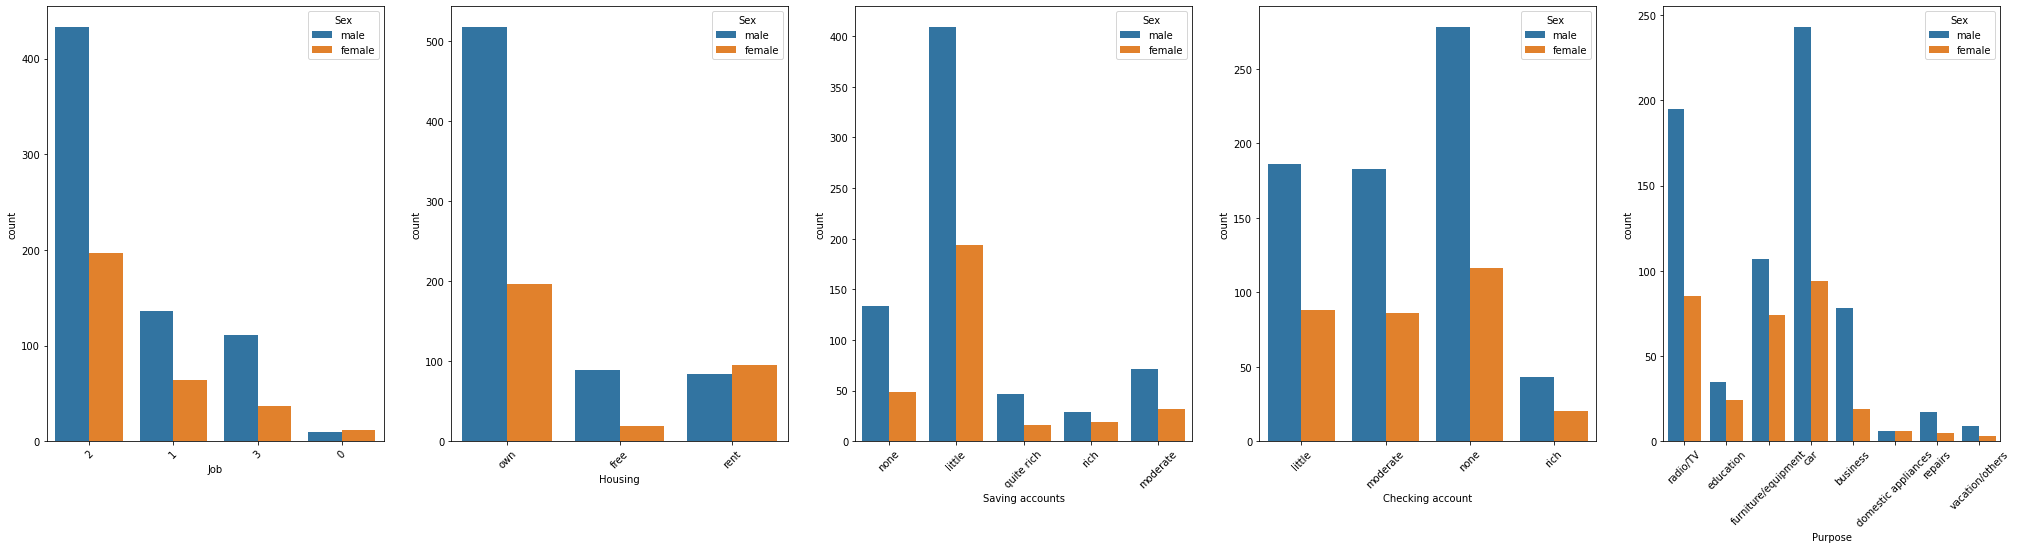

In [27]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(35,8))
sns.countplot(x="Job", hue="Sex", data=data, ax=ax1)
sns.countplot(x="Housing", hue="Sex", data=data, ax=ax2)
sns.countplot(x="Saving accounts", hue="Sex", data=data, ax=ax3)
sns.countplot(x="Checking account", hue="Sex", data=data, ax=ax4)
sns.countplot(x="Purpose", hue="Sex", data=data, ax=ax5)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45)


fig.show()

- most people who apply for credit loans have skilled job
- most people who apply for credit loans have own house
- most people who apply for credit loans have little saving accounts
- most people who apply for credit loans to buy car

**Job**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



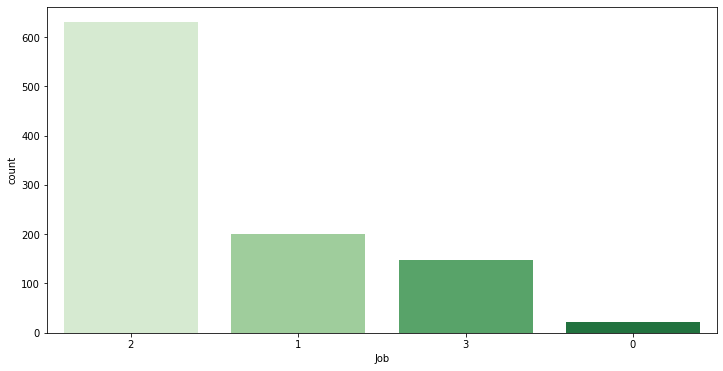

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(data['Job'], palette='Greens');

most people who apply for credit loans have skilled job

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



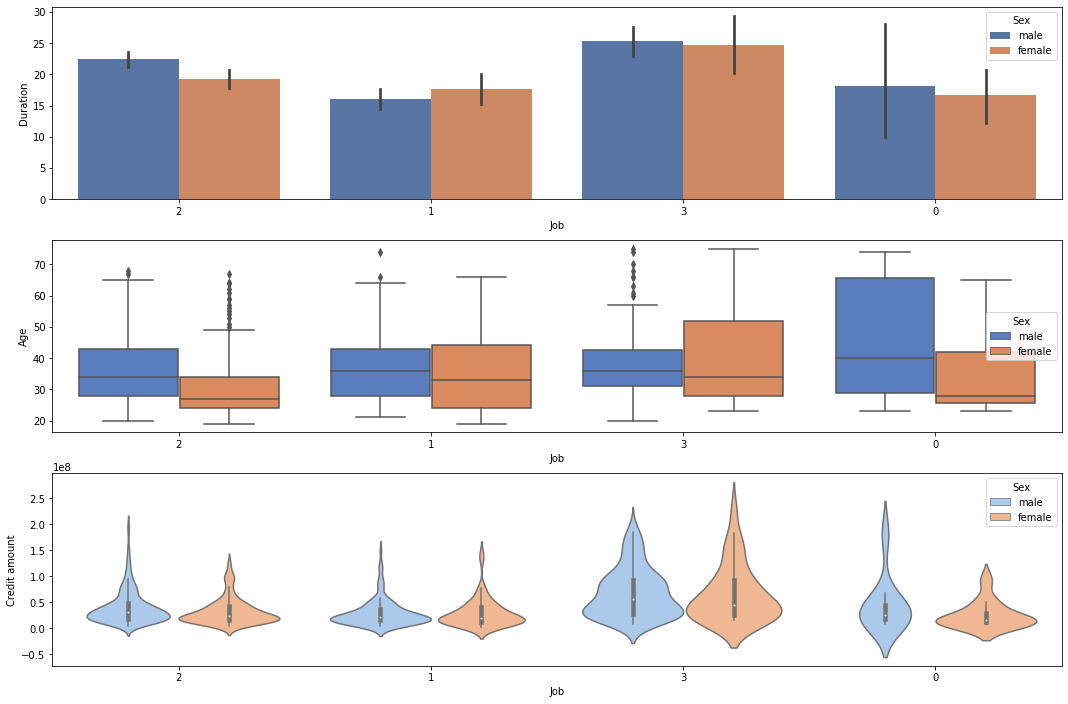

In [29]:
fig, ax =plt.subplots(3,1,figsize=(15,10))
plt.tight_layout(2)
sns.barplot(data['Job'], data["Duration"], hue = data["Sex"], ax=ax[0], palette='deep')
sns.boxplot(data['Job'], data['Age'], hue = data["Sex"], ax=ax[1], palette='muted')
sns.violinplot(data['Job'], data['Credit amount'], hue = data["Sex"], ax=ax[2], palette='pastel');

**Kesimpulan EDA**

- There are twice as many male customers as female.
- Most male who apply for credit loans have an age range of 20-40 years.
- Most female who apply for credit loans have an age range of 20-30 years.
- Most of customers are skilled.
- Most of customers have their own house.
- Most of customers have little saving accounts.
- Most amount of credit got for buy car. Most of the purpose has no differ based on gender.
- Duration is distributed from 4 to 72 months. Credits for a year or two are most common.
- People who have high skilled jobs have a larger credit amount and longer credit duration.

# Data Preprocessing

## Get Data for Model Inference

In [30]:
# get data inference
data_inf = data.sample(20, random_state=17)

# remove data inference from dataset
data = data.drop(data_inf.index)

# reset data inf and dataset index
data_inf.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)

# check result shape
print('Ukuran data asli :',data.shape)
print('Ukuran data inference :', data_inf.shape)

Ukuran data asli : (980, 9)
Ukuran data inference : (20, 9)


## Handling Missing Value

In [31]:
# Check Missing Values
data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

Missing Values ​​is already handled before, thats why there's no missing values.

## Handling Outlier

In [32]:
# Function untuk membuat Histogram dan Boxplot

def diagnostic_plots(data, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

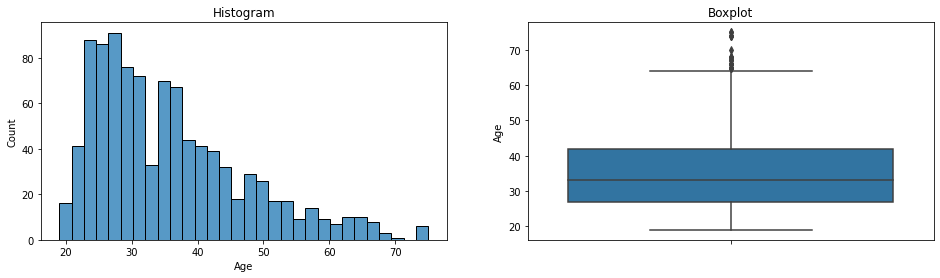


Skewness Value :  1.0124610267997607


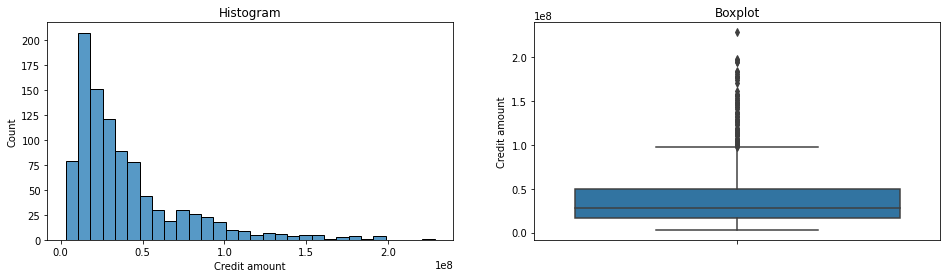


Skewness Value :  1.960022224577325


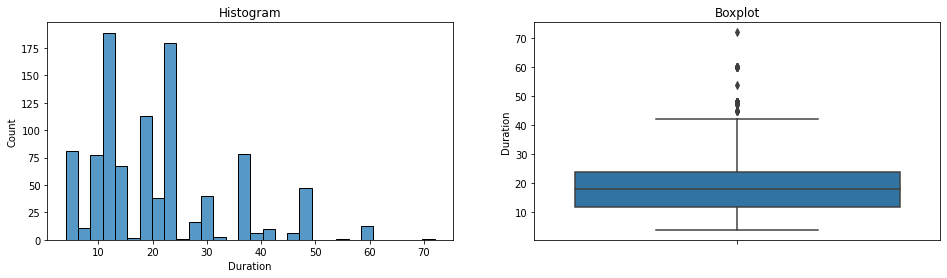


Skewness Value :  1.114773141583675


In [33]:
# Cek distribusi data semua varibel
diagnostic_plots(data, 'Age')
print('\nSkewness Value : ', data['Age'].skew())

diagnostic_plots(data, 'Credit amount')
print('\nSkewness Value : ', data['Credit amount'].skew())

diagnostic_plots(data, 'Duration')
print('\nSkewness Value : ', data['Duration'].skew())

the age, credit ammount and duration columns are skew and have many outliers

In [34]:
# Find outliers, used interquantile proximity rule IQR * 1.5

def find_skewed_boundaries(data, variable, distance):
    IQR = data[variable].quantile(0.75) - data[variable].quantile(0.25)

    lower_boundary = data[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = data[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

upper_boundary_A, lower_boundary_A = find_skewed_boundaries(data, 'Age', 1.5)
upper_boundary_C, lower_boundary_C = find_skewed_boundaries(data, 'Credit amount', 1.5)
upper_boundary_D, lower_boundary_D = find_skewed_boundaries(data, 'Duration', 1.5)

print('upper_boundary_Age :', upper_boundary_A)
print('lower_boundary_Age :', lower_boundary_A)

print('upper_boundary_Credit_amount :', upper_boundary_C)
print('lower_boundary_Credit_amount :', lower_boundary_C)

print('upper_boundary_Duration :', upper_boundary_D)
print('lower_boundary_Duration :', lower_boundary_D)

upper_boundary_Age : 64.5
lower_boundary_Age : 4.5
upper_boundary_Credit_amount : 97594078.875
lower_boundary_Credit_amount : -31467112.125
upper_boundary_Duration : 42.0
lower_boundary_Duration : -6.0


## Handling Outlier with CAPPING

In [35]:
# Make capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Age', 'Credit amount', 'Duration'])

windsoriser.fit(data)

data_t = windsoriser.transform(data)

In [36]:
# Check the minimum limit for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Check the Maximum limit for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'Age': 4.5, 'Credit amount': -31467112.125, 'Duration': -6.0}
Right Tail Caps :  {'Age': 64.5, 'Credit amount': 97594078.875, 'Duration': 42.0}


In [37]:
# Show dataset describe before and after Capping
print('credit-card-information Dataframe - Before Capping')
print(data.describe())
print('')
print('credit-card-information Dataframe - After Capping')
print(data_t.describe())

credit-card-information Dataframe - Before Capping
              Age  Credit amount    Duration
count  980.000000   9.800000e+02  980.000000
mean    35.628571   4.055617e+07   20.790816
std     11.396055   3.508685e+07   12.007068
min     19.000000   3.099750e+06    4.000000
25%     27.000000   1.693083e+07   12.000000
50%     33.000000   2.862929e+07   18.000000
75%     42.000000   4.919613e+07   24.000000
max     75.000000   2.284392e+08   72.000000

credit-card-information Dataframe - After Capping
              Age  Credit amount    Duration
count  980.000000   9.800000e+02  980.000000
mean    35.534184   3.778467e+07   20.201020
std     11.122546   2.708224e+07   10.564525
min     19.000000   3.099750e+06    4.000000
25%     27.000000   1.693083e+07   12.000000
50%     33.000000   2.862929e+07   18.000000
75%     42.000000   4.919613e+07   24.000000
max     64.500000   9.759408e+07   42.000000


Age - Before Capping


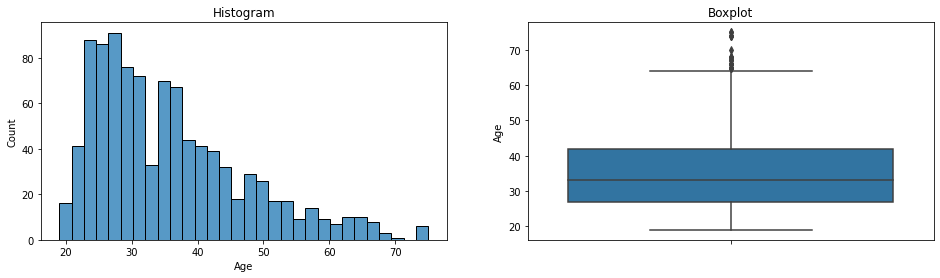


Age - After Capping


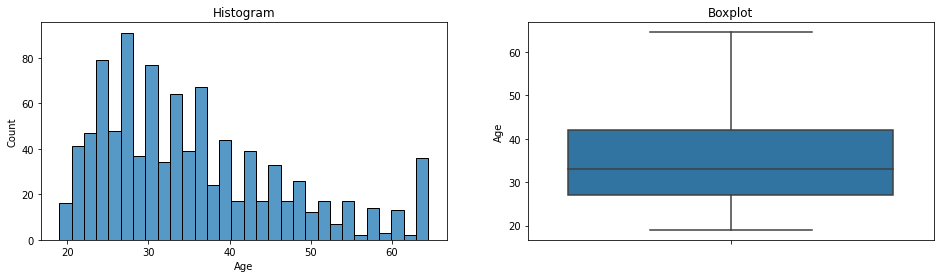

Credit amount - Before Capping


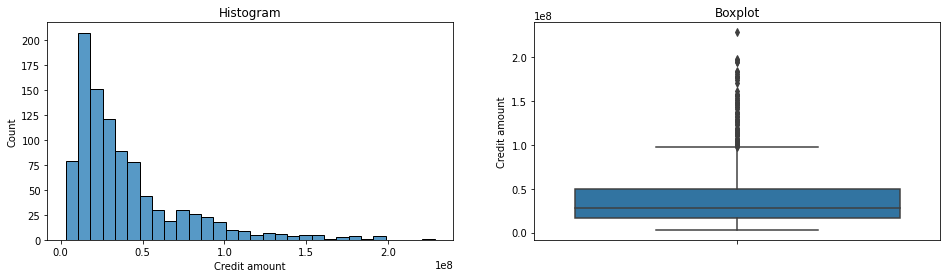


Credit amount - After Capping


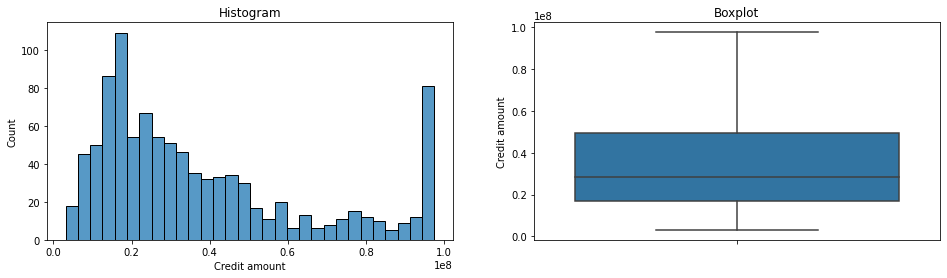

Duration - Before Capping


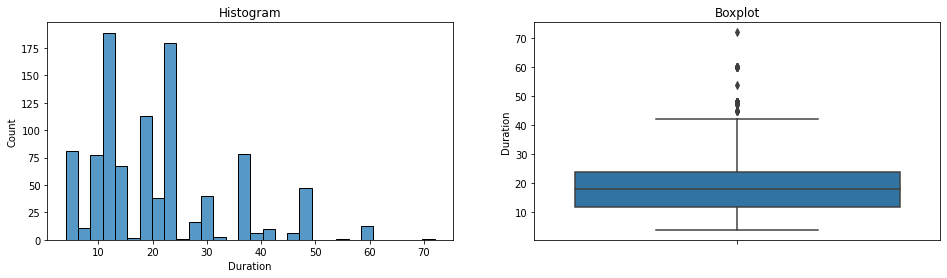


Duration - After Capping


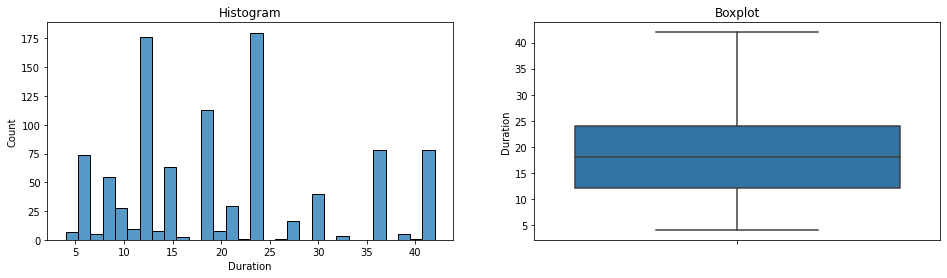

In [38]:
# Recheck outliers After capping

print('Age - Before Capping')
diagnostic_plots(data, 'Age')
print('\nAge - After Capping')
diagnostic_plots(data_t, 'Age')

print('Credit amount - Before Capping')
diagnostic_plots(data, 'Credit amount')
print('\nCredit amount - After Capping')
diagnostic_plots(data_t, 'Credit amount')

print('Duration - Before Capping')
diagnostic_plots(data, 'Duration')
print('\nDuration - After Capping')
diagnostic_plots(data_t, 'Duration')

## Split Between Numerical Columns and Categorical Columns

In [39]:
data_t.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,64.5,male,2,own,none,little,1.449443e+07,6.0,radio/TV
1,22.0,female,2,own,little,moderate,7.378645e+07,42.0,radio/TV
2,49.0,male,1,own,little,none,2.598830e+07,12.0,education
3,45.0,male,2,free,little,little,9.759408e+07,42.0,furniture/equipment
4,53.0,male,2,free,little,little,6.038313e+07,24.0,car


In [40]:
# Get Numerical Columns and Categorical Columns

num_columns = data_t.select_dtypes(include=np.number).columns.tolist()
cat_columns = data_t.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['Age', 'Credit amount', 'Duration']
Categorical Columns :  ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']


In [41]:
# membuat dataframe untuk data_num dan data_cat

data_num = data_t[num_columns]
data_cat = data_t[cat_columns]

## Feature Encoding

In [42]:
encoder = LabelEncoder()
for label in data_cat:
    data_cat[label] = encoder.fit_transform(data_cat[label])

## Feature Scalling

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_num)
data_scaled = pd.DataFrame(X_scaled, columns=data_num.columns)
data_scaled.head()

,Age,Credit amount,Duration
0,2.605573,-0.860421,-1.344904
1,-1.217446,1.330029,2.064467
2,1.211296,-0.435798,-0.776675
3,0.851482,2.209564,2.064467
4,1.571109,0.834864,0.359781


## PCA

In [48]:
# feature di data_scaled

data_scaled.shape

(980, 3)

In [49]:
#Cek Multicollinearity

vif_data = pd.DataFrame()
vif_data["feature"] = data_scaled.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_scaled.values, i) for i in range(len(data_scaled.columns))]

vif_data.sort_values('VIF', ascending=False).reset_index(drop=True)

,feature,VIF
0,Duration,1.713207
1,Credit amount,1.710688
2,Age,1.005566


### Reduksi Dimensi Menggunakan PCA

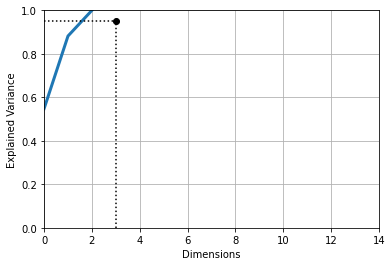

In [56]:
# define PCA
pca = PCA()
pca.fit(data_scaled)

# PCA dengan informasi 0.95

cumsum = np.cumsum(pca.explained_variance_ratio_) # cumsum = kulumasi baris atau kolom berikutnya bergantung axis = 0 atau 1
d = np.argmax(cumsum >= 0.95) + 1                 # argmax = returns the indices of the maximum values along an axis.   

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 14, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")           # plt. plot([X1,X2], [y1,y2]), ':k' = balck
plt.plot([0, d], [0.95, 0.95], "k:")        # plt. plot([X1,X2], [y1,y2]), ':k' = balck
plt.plot(d, 0.95, "ko")                     # plot elbow, ko = circle b
plt.grid(True)
plt.show()

In [57]:
# melihat n_components untuk 0.95 informasi

pca2 = PCA(n_components=0.95)
data_reduced2 = pca2.fit_transform(data_scaled)
pca.n_components_

3

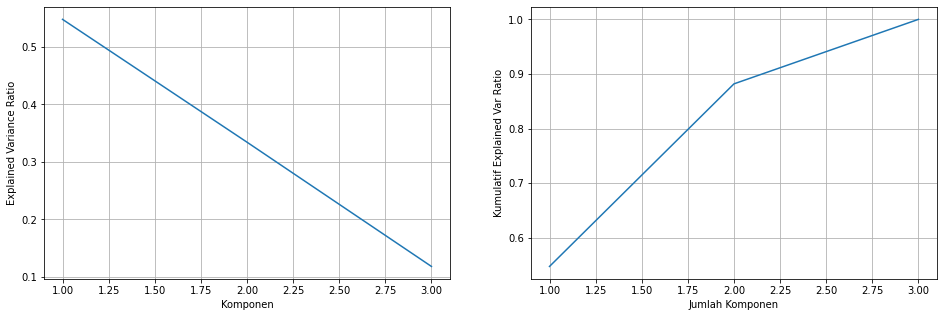

In [60]:
# melihat EVR dan cumsum EVR

# plot EVR
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,4),pca.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')
ax[0].grid()

# plot cumsum EVR
ax[1].plot(range(1,4),np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
ax[1].grid()
plt.show()

# Model

## Kmeans Clustering

In [61]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=10).fit(data_scaled)
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

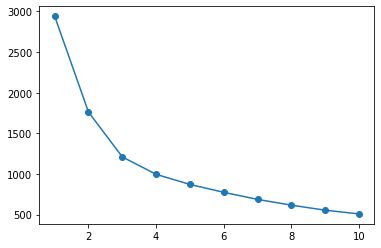

In [62]:
plt.plot(range(1,11), inertia, marker='o');

In [63]:
D = []
for i in range(1,9):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)

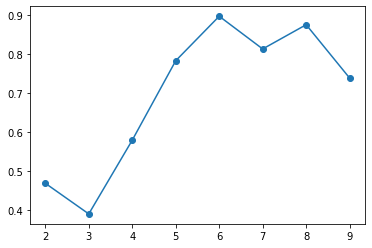

In [64]:
plt.plot(range(2,10), D, marker='o');

In [65]:
kmeans = KMeans(n_clusters=2, random_state=10).fit(X_scaled)
labels_kmeans = kmeans.labels_

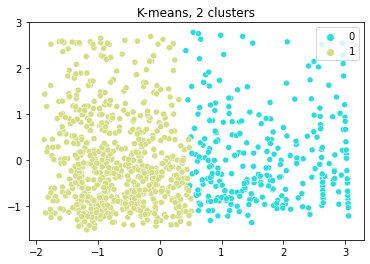

In [66]:
plt.title('K-means, 2 clusters')
sns.scatterplot(x = data_reduced2[:,0], y = data_reduced2[:,1], hue=labels_kmeans, palette='rainbow');

In [67]:
data_clustered = data_t.copy()
data_clustered['cluster_kmeans'] = labels_kmeans

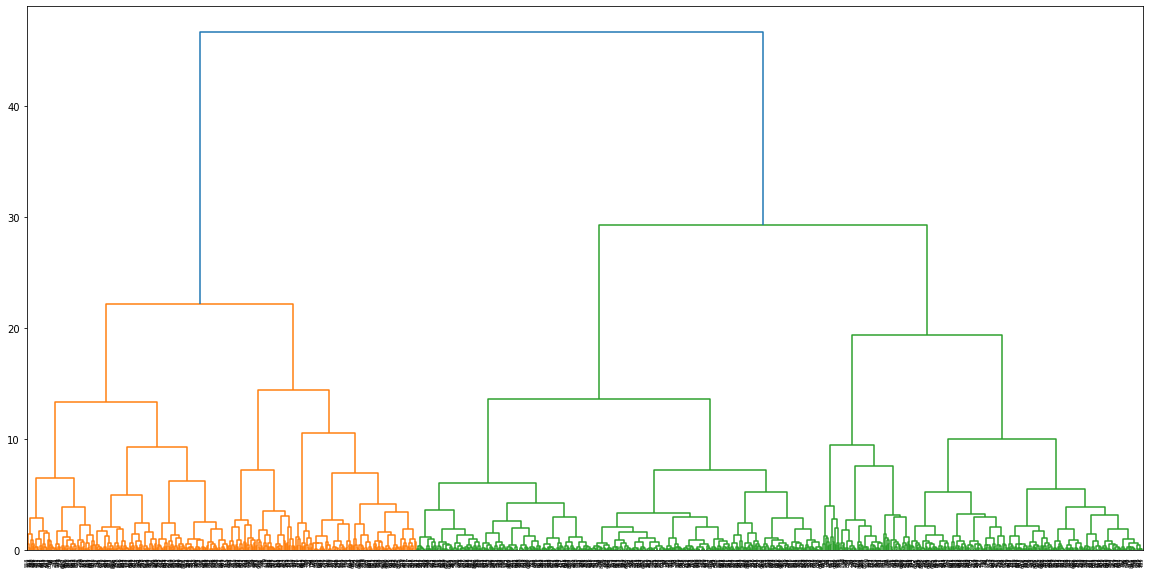

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(20,10))
linkage_ = linkage(X_scaled, method='ward')
dendrogram_ = dendrogram(linkage_)

## Agglomerative Clustering

In [69]:
silhouette = []
for i in tqdm(range(2,11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X_scaled)
    labels = agg.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette.append(score)

100%|██████████| 9/9 [00:00<00:00, 14.56it/s]


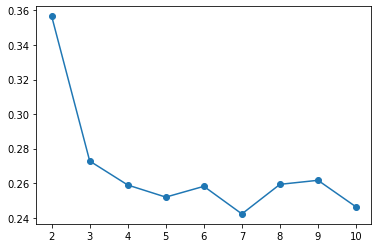

In [70]:
plt.plot(range(2,11), silhouette, marker='o');

In [71]:
agg_cluster = AgglomerativeClustering(n_clusters = 2).fit(X_scaled)
labels_agg = agg_cluster.labels_

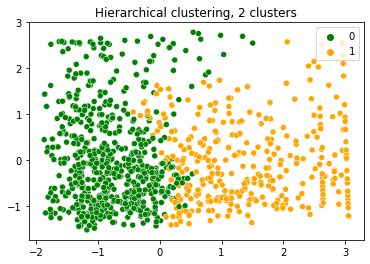

In [72]:
plt.title('Hierarchical clustering, 2 clusters')
sns.scatterplot(x = data_reduced2[:, 0], y = data_reduced2[:, 1], hue=agg_cluster.labels_,  palette=['green','orange']);

In [73]:
data_clustered['cluster_agg'] = labels_agg

Based on the Model: The best model for this dataset is Kmeans, because Kmeans is able to form credit loan customer segmentation.

# EDA After Clustering

In [74]:
data_clustered

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,cluster_kmeans,cluster_agg
0,64.5,male,2,own,none,little,1.449443e+07,6.0,radio/TV,1,0
1,22.0,female,2,own,little,moderate,7.378645e+07,42.0,radio/TV,0,1
2,49.0,male,1,own,little,none,2.598830e+07,12.0,education,1,0
3,45.0,male,2,free,little,little,9.759408e+07,42.0,furniture/equipment,0,1
4,53.0,male,2,free,little,little,6.038313e+07,24.0,car,0,1
...,...,...,...,...,...,...,...,...,...,...,...
975,31.0,female,1,own,little,none,2.152466e+07,12.0,furniture/equipment,1,0
976,40.0,male,3,own,little,little,4.782294e+07,30.0,car,0,1
977,38.0,male,2,own,little,none,9.968796e+06,12.0,radio/TV,1,0
978,23.0,male,2,free,little,little,2.287616e+07,42.0,radio/TV,0,1


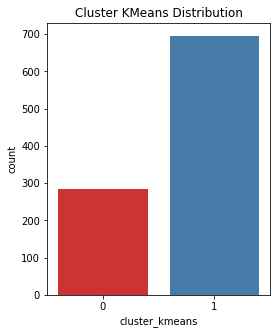

In [75]:
plt.figure(figsize=(4, 5))
sns.countplot(data=data_clustered, x='cluster_kmeans', palette='Set1')
plt.title('Cluster KMeans Distribution')
plt.show()

In [76]:
data_clustered.groupby('cluster_kmeans')['cluster_kmeans'].count()

cluster_kmeans
0    285
1    695
Name: cluster_kmeans, dtype: int64

Text(0.5, 1.0, 'Duration K1')

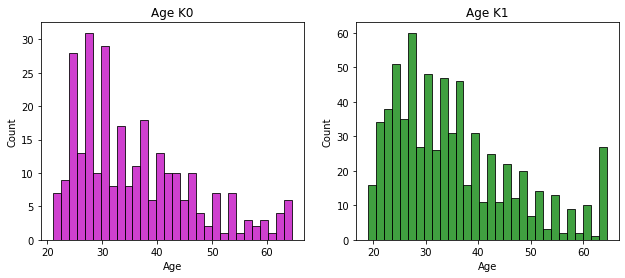

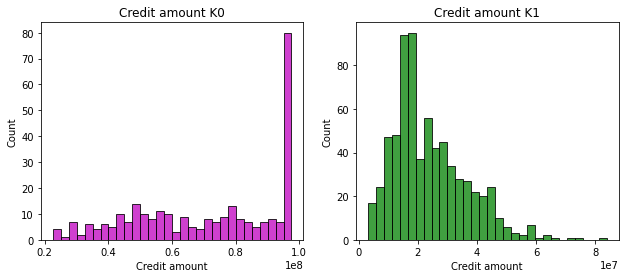

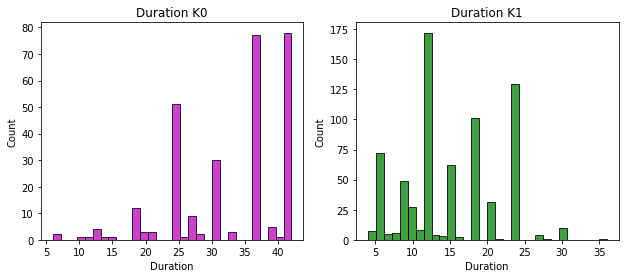

In [77]:
dataK0 = data_clustered[data_clustered.cluster_kmeans == 0]
dataK1 = data_clustered[data_clustered.cluster_kmeans == 1]

# look at Age Column
    
# Define figure size
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(dataK0, x = 'Age', bins=30, color='m')
plt.title('Age K0')

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(dataK1, x = 'Age', bins=30, color='g')
plt.title('Age K1')

# look at Credit amount Column
    
# Define figure size
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(dataK0, x = 'Credit amount', bins=30, color='m')
plt.title('Credit amount K0')

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(dataK1, x = 'Credit amount', bins=30, color='g')
plt.title('Credit amount K1')

# look at Duration Column
    
# Define figure size
plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(dataK0, x = 'Duration', bins=30, color='m')
plt.title('Duration K0')

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(dataK1, x = 'Duration', bins=30, color='g')
plt.title('Duration K1')

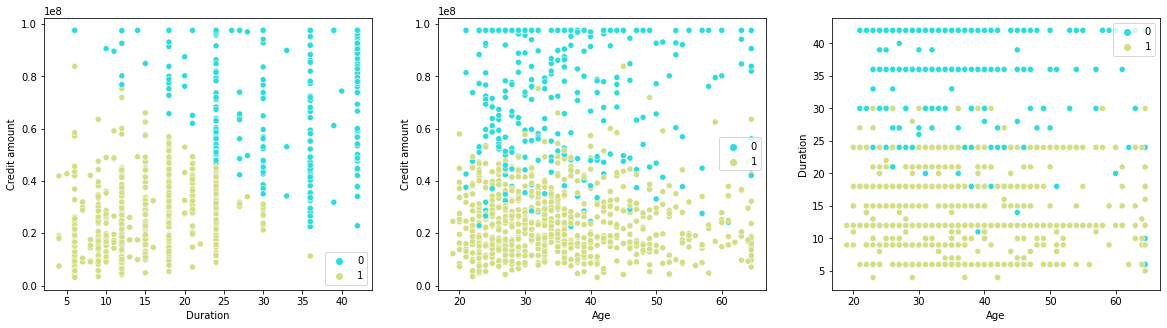

In [78]:
fig, ax  = plt.subplots(1,3,figsize=(20,5))
sns.scatterplot(x = data_clustered['Duration'], y = data_clustered['Credit amount'], hue=labels_kmeans, ax=ax[0], palette='rainbow');
sns.scatterplot(x = data_clustered['Age'], y = data_clustered['Credit amount'], hue=labels_kmeans, ax=ax[1], palette='rainbow');
sns.scatterplot(x = data_clustered['Age'], y = data_clustered['Duration'], hue=labels_kmeans, ax=ax[2], palette='rainbow');

In [79]:
data_clustered.groupby('cluster_kmeans').mean()

,Age,Credit amount,Duration,cluster_agg
cluster_kmeans,,,,
0,35.849123,7.160805e+07,32.561404,0.954386
1,35.405036,2.391466e+07,15.132374,0.100719


**Cluster 0**

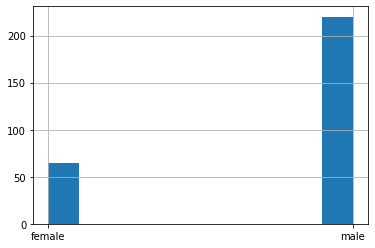

In [80]:
data_clustered[data_clustered['cluster_kmeans']==0]['Sex'].hist()

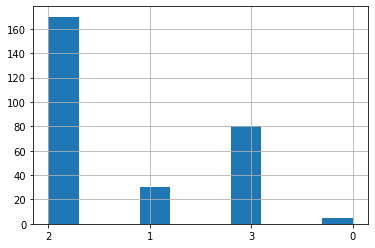

In [81]:
data_clustered[data_clustered['cluster_kmeans']==0]['Job'].hist()

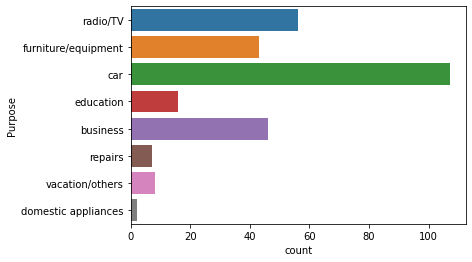

In [82]:
sns.countplot(y ='Purpose', data = data_clustered[data_clustered['cluster_kmeans']==0])
plt.show()

**Cluster 1**

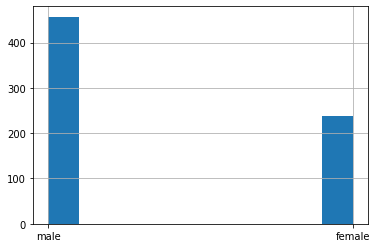

In [83]:
data_clustered[data_clustered['cluster_kmeans']==1]['Sex'].hist()

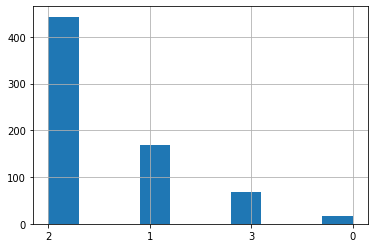

In [84]:
data_clustered[data_clustered['cluster_kmeans']==1]['Job'].hist()

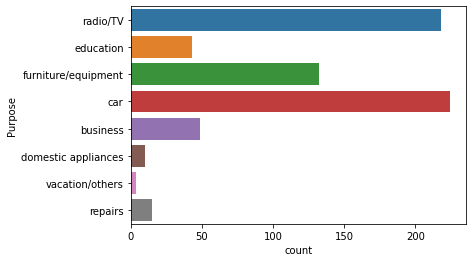

In [85]:
sns.countplot(y ='Purpose', data = data_clustered[data_clustered['cluster_kmeans']==1])
plt.show()

## EDA After Clustering Conclution

- Cluster 0 has the highest mean Credit amount (IDR 71608048) and the longest mean Duration (32 months).  most people in this cluster have skilled & highly skilled jobs

- Cluster 1 has mean Credit amount = IDR 23914655.99 and the mean Duration = 15 months. most people in this cluster have skilled jobs

- Average Age is very similar throughout the clusters

- For all clusters main Purpose are car and radio/TV.

based on the EDA results, I conclude that cluster 0 = good risk and cluster 1 = bad risk



# Model Inference

In [86]:
# show data_inf
data_inf

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,40,male,2,own,quite rich,none,33167325,22,radio/TV
1,28,male,2,own,moderate,rich,16403877,6,car
2,24,male,1,own,little,little,21661053,24,furniture/equipment
3,23,male,2,own,little,rich,48517287,36,radio/TV
4,35,male,2,own,none,none,12101424,12,radio/TV
5,25,female,2,own,none,none,29683206,36,radio/TV
6,26,male,2,own,little,moderate,11245893,8,business
7,36,male,2,own,little,moderate,28976463,36,radio/TV
8,26,male,2,own,little,little,102031371,36,car
9,39,male,1,own,none,none,116996964,54,car


In [87]:
data_inf.describe()

,Age,Credit amount,Duration
count,20.000000,2.000000e+01,20.000000
mean,31.500000,4.076419e+07,26.400000
std,9.719757,3.118547e+07,13.593342
min,23.000000,8.084148e+06,6.000000
25%,25.000000,1.685024e+07,14.250000
50%,27.500000,3.142527e+07,24.000000
75%,35.250000,5.180302e+07,36.000000
max,56.000000,1.169970e+08,54.000000


In [88]:
# Split between Numerical Columns and Categorical Columns

data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

data_inf_num

,Age,Credit amount,Duration
0,40,33167325,22
1,28,16403877,6
2,24,21661053,24
3,23,48517287,36
4,35,12101424,12
5,25,29683206,36
6,26,11245893,8
7,36,28976463,36
8,26,102031371,36
9,39,116996964,54


In [89]:
# Encoding
encoder = LabelEncoder()
for label in data_inf_cat:
    data_inf_cat[label] = encoder.fit_transform(data_inf_cat[label])

In [90]:
#Scalling
scaler = StandardScaler()
X_inf_scaled = scaler.fit_transform(data_inf_num)
data_inf_scaled = pd.DataFrame(X_inf_scaled, columns=data_inf_num.columns)
data_inf_scaled.head()

,Age,Credit amount,Duration
0,0.897226,-0.249931,-0.332097
1,-0.369446,-0.801436,-1.539721
2,-0.791670,-0.628479,-0.181144
3,-0.897226,0.255071,0.724575
4,0.369446,-0.942983,-1.086862


In [91]:
# reduce with PCA

data_inf_reduced = pca2.transform(data_inf_scaled)
data_inf_reduced

array([[-4.34927367e-01,  8.88031753e-01, -2.35647533e-03],
       [-1.64568565e+00, -3.76450647e-01,  5.47297914e-01],
       [-5.51311483e-01, -8.25949659e-01, -2.61538366e-01],
       [ 7.16233033e-01, -8.99205043e-01, -2.71153419e-01],
       [-1.44457689e+00,  3.37823342e-01,  7.77810587e-02],
       [ 2.73110317e-01, -7.29740302e-01, -7.22185273e-01],
       [-1.65321087e+00, -6.02688755e-01,  3.35376392e-01],
       [ 2.26328547e-01,  4.26776450e-01, -8.17108961e-01],
       [ 1.95133176e+00, -4.66616135e-01,  9.48392602e-01],
       [ 3.22435587e+00,  8.94793329e-01,  2.43317837e-01],
       [-6.62391880e-01, -7.30842999e-01, -3.76787863e-01],
       [-1.48287353e+00, -4.04533420e-01,  7.02523610e-02],
       [-1.70985554e-01, -4.51939393e-01,  4.24665422e-01],
       [ 8.39566556e-01,  2.57630976e+00,  9.90710185e-01],
       [-1.50755587e+00, -8.29000071e-01,  6.31571331e-02],
       [ 8.69196758e-02, -6.60481779e-01,  3.71068681e-01],
       [ 1.19992545e+00,  2.58557206e+00

In [92]:
# categorization with kmeans

icluster_K= kmeans.predict(data_inf_reduced)

# added column segmentation based on kmeans

data_icluster= data_inf.copy()
data_icluster['cluster_kmeans'] = icluster_K

data_icluster

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,cluster_kmeans
0,40,male,2,own,quite rich,none,33167325,22,radio/TV,0
1,28,male,2,own,moderate,rich,16403877,6,car,1
2,24,male,1,own,little,little,21661053,24,furniture/equipment,1
3,23,male,2,own,little,rich,48517287,36,radio/TV,1
4,35,male,2,own,none,none,12101424,12,radio/TV,1
5,25,female,2,own,none,none,29683206,36,radio/TV,1
6,26,male,2,own,little,moderate,11245893,8,business,1
7,36,male,2,own,little,moderate,28976463,36,radio/TV,1
8,26,male,2,own,little,little,102031371,36,car,1
9,39,male,1,own,none,none,116996964,54,car,0


In [93]:
# grouping new customers into cluster_kmeans

data_icluster.groupby('cluster_kmeans')['cluster_kmeans'].count()

cluster_kmeans
0     4
1    16
Name: cluster_kmeans, dtype: int64

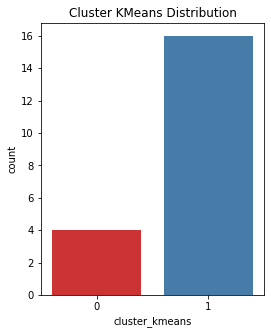

In [94]:
# visualization based on cluster_kmeans

plt.figure(figsize=(4, 5))
sns.countplot(data=data_icluster, x='cluster_kmeans', palette='Set1')
plt.title('Cluster KMeans Distribution')
plt.show()

Cluster 0 : 4
cluster 1 : 16